# Projet Machine Learning - Groupe 1

Promotion 58 - 4GMM, Année universitaire 2023-2024 

Julia Manon (A), Piot Damien (B), Dumas Thomas (B), Ben Abdallah Selim (A)


## Prise en main des données et analyse exploratoire

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Ouverture du jeu de données

In [47]:
# Lecture des données
pd.set_option('display.max_columns', None) # Affichage de toutes les colonnes du dataframe
path=""
data=pd.read_csv(path+"global-data-on-sustainable-energy .csv",sep=",")

# Vérification du contenu
data.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Les noms des colonnes sont assez compliqués, ils sont longs et contiennent ds espaces. Nous allons les renommer par la suite pour simplifier le code et les appels aux colonnes. 

In [48]:
# Nous allons renommer les colonnes pour simplifier notre dataframe
# mon_dataframe.rename(columns={'ancien nom': 'nouveau nom'})

data.rename(columns={'Access to electricity (% of population)' : 'Elec_access'}, inplace=True)
data.rename(columns={'Access to clean fuels for cooking' : 'Clean_access'}, inplace=True)
data.rename(columns={'Renewable-electricity-generating-capacity-per-capita' : 'Renewable_per_capita'}, inplace=True)
data.rename(columns={'Financial flows to developing countries (US $)' : 'Financial_flows'}, inplace=True)
data.rename(columns={'Renewable energy share in the total final energy consumption (%)' : 'Renewable_share'}, inplace=True)
data.rename(columns={'Electricity from fossil fuels (TWh)' : 'Fossil_elec'}, inplace=True)
data.rename(columns={'Electricity from nuclear (TWh)' : 'Nuclear_elec'}, inplace=True)
data.rename(columns={'Electricity from renewables (TWh)' : 'Renewable_elec'}, inplace=True)
data.rename(columns={'Low-carbon electricity (% electricity)' : 'Low_carb_elec'}, inplace=True)
data.rename(columns={'Primary energy consumption per capita (kWh/person)' : 'Energy_per_capita'}, inplace=True)
data.rename(columns={'Energy intensity level of primary energy (MJ/$2017 PPP GDP)' : 'PEnergy_intensity'}, inplace=True)
data.rename(columns={'Value_co2_emissions_kt_by_country' : 'CO2'}, inplace=True)
data.rename(columns={'Renewables (% equivalent primary energy)' : 'Renewables'}, inplace=True)
data.rename(columns={'gdp_growth' : 'Growth'}, inplace=True)
data.rename(columns={'gdp_per_capita' : 'GDP_per_capita'}, inplace=True)
data.rename(columns={data.columns[-4] : 'Density'}, inplace=True)
data.rename(columns={'Land Area(Km2)' : 'Area'}, inplace=True)

data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [49]:
# Etude des types des colonnes
data.dtypes

Entity                   object
Year                      int64
Elec_access             float64
Clean_access            float64
Renewable_per_capita    float64
Financial_flows         float64
Renewable_share         float64
Fossil_elec             float64
Nuclear_elec            float64
Renewable_elec          float64
Low_carb_elec           float64
Energy_per_capita       float64
PEnergy_intensity       float64
CO2                     float64
Renewables              float64
Growth                  float64
GDP_per_capita          float64
Density                  object
Area                    float64
Latitude                float64
Longitude               float64
dtype: object

In [50]:
# Transformation de la colonne 'Year' en variable qualitative  
data['Year'] = data['Year'].astype('category')
data['Entity'] = data['Entity'].astype('category')

# Traitement de la colonne 'Density'
data['Density'] = data['Density'].str.replace(',','.')
data['Density'] = data['Density'].astype(float)

# Affichage du type des variables après traitement
data.dtypes

Entity                  category
Year                    category
Elec_access              float64
Clean_access             float64
Renewable_per_capita     float64
Financial_flows          float64
Renewable_share          float64
Fossil_elec              float64
Nuclear_elec             float64
Renewable_elec           float64
Low_carb_elec            float64
Energy_per_capita        float64
PEnergy_intensity        float64
CO2                      float64
Renewables               float64
Growth                   float64
GDP_per_capita           float64
Density                  float64
Area                     float64
Latitude                 float64
Longitude                float64
dtype: object

In [51]:
data.head()

,Entity,Year,Elec_access,Clean_access,Renewable_per_capita,Financial_flows,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Renewables,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


### Etude des valeurs manquantes

In [52]:
data_missing_value = data.isna().mean().sort_values(ascending=False) # On affiche les pourcentages les plus importants en premier

print('--- Taux de valeurs manquantes ---')
print(data_missing_value*100)

--- Taux de valeurs manquantes ---
Renewables              58.563990
Financial_flows         57.248561
Renewable_per_capita    25.513839
CO2                     11.729241
Growth                   8.687312
GDP_per_capita           7.728145
PEnergy_intensity        5.672787
Renewable_share          5.316525
Clean_access             4.631406
Nuclear_elec             3.453001
Low_carb_elec            1.151000
Renewable_elec           0.575500
Fossil_elec              0.575500
Elec_access              0.274048
Latitude                 0.027405
Area                     0.027405
Density                  0.027405
Longitude                0.027405
Energy_per_capita        0.000000
Year                     0.000000
Entity                   0.000000
dtype: float64


On observe que pour les colonnes 'Renewables' et 'Financial_flows', il manque plus de la moitié des donneés. Pour la colonne 'Renewable_per_capita', il manque une donnée sur 4. Nous décidons dans un premier temps de supprimer ces trois colonnes. 

In [53]:
# Suppression des colonnes

data.drop('Renewables', axis=1, inplace=True)
data.drop('Financial_flows', axis=1, inplace=True)
data.drop('Renewable_per_capita', axis=1, inplace=True)


In [58]:
data.head()
# data.shape --> On trouve (3649, 18)

,Entity,Year,Elec_access,Clean_access,Renewable_share,Fossil_elec,Nuclear_elec,Renewable_elec,Low_carb_elec,Energy_per_capita,PEnergy_intensity,CO2,Growth,GDP_per_capita,Density,Area,Latitude,Longitude
3,Afghanistan,2003,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60.0,652230.0,33.93911,67.709953


In [59]:
# On veut maintenant supprimer les lignes qui contiennent des valeurs manquantes

# Suppression de toutes les lignes contenant au moins une valeur manquante
data = data.dropna(axis = 0, how = 'any')

In [60]:
data.shape #(2868, 18)

(2868, 18)

### Analyse unidimensionnelle des données


On s'intéresse dans un premier temps aux variables quantitatives.

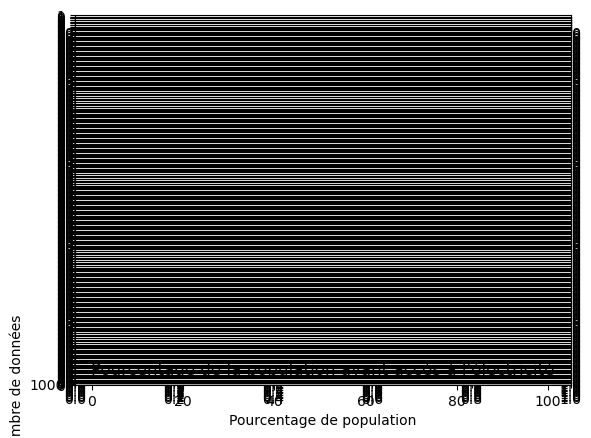

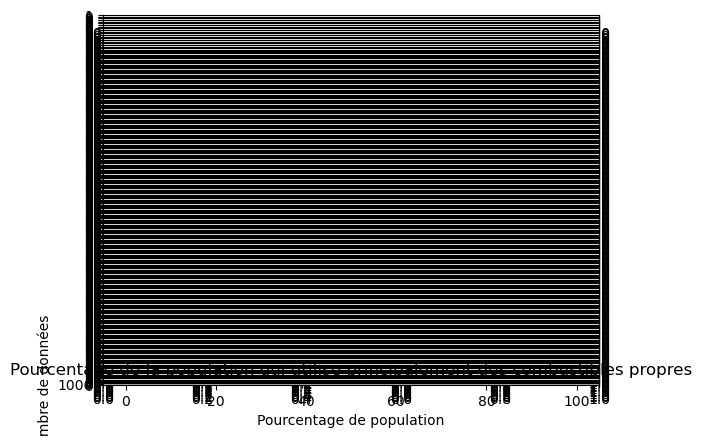

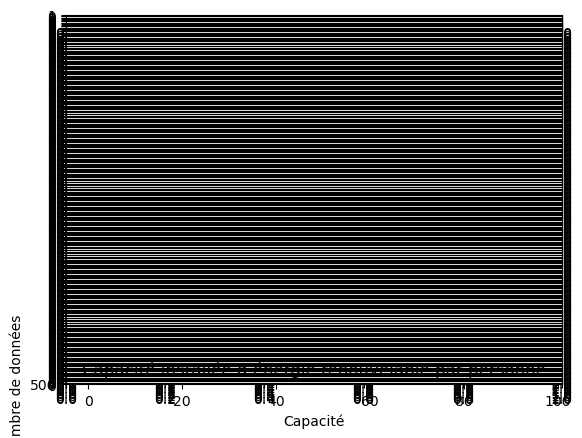

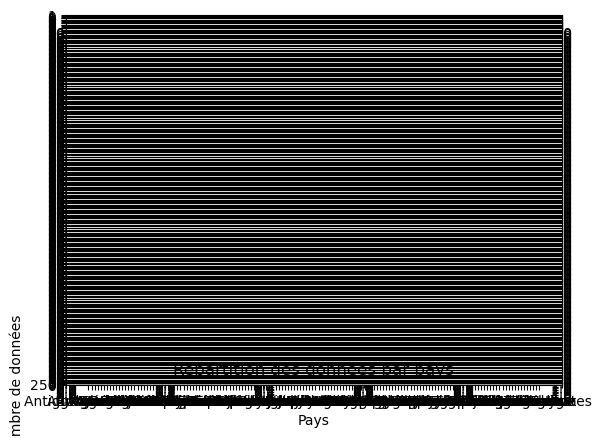

In [66]:
plt.subplots(221)

data["Elec_access"].hist()
plt.title("Pourcentage de la population ayant accès à l'électricité")
plt.xlabel("Pourcentage de population")
plt.ylabel("Nombre de données")

plt.subplots(222)

data["Clean_access"].hist()
plt.title("Pourcentage de la population qui utilise principalement des combustibles propres")
plt.xlabel("Pourcentage de population")
plt.ylabel("Nombre de données")

plt.subplots(223)

data["Renewable_share"].hist()
plt.title("Capacité installée d’énergie renouvelable par personne")
plt.xlabel("Capacité")
plt.ylabel("Nombre de données")

plt.subplots(224)

data["Entity"].hist()
plt.title("Répartition des données par pays")
plt.xlabel("Pays")
plt.ylabel("Nombre de données")

plt.show()

Interprétation : Beaucoup de personnes ont un accès à l'électricité, mais cette variable n'est pas du tout symétrique.